In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sys.path.append("../")

from fwc2.dataset import load_pretraining 

In [3]:
train_data, test_data = load_pretraining(subsets=['cicids17'])

['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', 'Friday-WorkingHours-Morning.pcap_ISCX.csv', 'Monday-WorkingHours.pcap_ISCX.csv', 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', 'Tuesday-WorkingHours.pcap_ISCX.csv', 'Wednesday-workingHours.pcap_ISCX.csv'] 8


c:\Users\client\Projects\PhD\FWC2L\expirements\..\fwc2\dataset.py:49: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589519 entries, 0 to 3119344
Data columns (total 77 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   flow_duration                1589519 non-null  float64
 1   total_fwd_packets            1589519 non-null  float64
 2   total_backward_packets       1589519 non-null  float64
 3   total_length_of_fwd_packets  1589519 non-null  float64
 4   total_length_of_bwd_packets  1589519 non-null  float64
 5   fwd_packet_length_max        1589519 non-null  float64
 6   fwd_packet_length_min        1589519 non-null  float64
 7   fwd_packet_length_mean       1589519 non-null  float64
 8   fwd_packet_length_std        1589519 non-null  float64
 9   bwd_packet_length_max        1589519 non-null  float64
 10  bwd_packet_length_min        1589519 non-null  float64
 11  bwd_packet_length_mean       1589519 non-null  float64
 12  bwd_packet_length_std        1589519 non-null  

In [7]:
train_data.label.value_counts()

label
benign    1589519
Name: count, dtype: int64

In [2]:
csv_files = [f for f in os.listdir('../datasets/cicids17') if f.endswith('.csv')]
print(csv_files, len(csv_files))
assert len(csv_files) > 0, f'must conatin datsets files (csv)'

dfs = []
for csv_file in csv_files:
    file_path = os.path.join('../datasets/cicids17', csv_file)
    try:
        print(f'reading {csv_file} ...')
        df = pd.read_csv(file_path)
        dfs.append(df)
    except Exception as e:
        print(f"Error loading {csv_file}: {str(e)}")
        continue

df = pd.concat(dfs, ignore_index=True)    
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', 'Friday-WorkingHours-Morning.pcap_ISCX.csv', 'Monday-WorkingHours.pcap_ISCX.csv', 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', 'Tuesday-WorkingHours.pcap_ISCX.csv', 'Wednesday-workingHours.pcap_ISCX.csv'] 8
reading Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv ...
reading Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv ...
reading Friday-WorkingHours-Morning.pcap_ISCX.csv ...
reading Monday-WorkingHours.pcap_ISCX.csv ...
reading Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv ...
reading Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv ...


C:\Users\client\AppData\Local\Temp\ipykernel_7032\2420765201.py:10: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


reading Tuesday-WorkingHours.pcap_ISCX.csv ...
reading Wednesday-workingHours.pcap_ISCX.csv ...


In [3]:
df['label'] = df.label.str.lower()

In [34]:
df['label'].value_counts() / df.shape[0] 

label
benign                        0.803245
dos hulk                      0.081334
portscan                      0.056171
ddos                          0.045249
dos goldeneye                 0.003638
ftp-patator                   0.002806
ssh-patator                   0.002084
dos slowloris                 0.002049
dos slowhttptest              0.001944
bot                           0.000695
web attack   brute force      0.000533
web attack   xss              0.000230
infiltration                  0.000013
web attack   sql injection    0.000007
heartbleed                    0.000004
Name: count, dtype: float64

In [10]:
df.columns

Index(['flow_id', 'source_ip', 'source_port', 'destination_ip',
       'destination_port', 'protocol', 'timestamp', 'flow_duration',
       'total_fwd_packets', 'total_backward_packets',
       'total_length_of_fwd_packets', 'total_length_of_bwd_packets',
       'fwd_packet_length_max', 'fwd_packet_length_min',
       'fwd_packet_length_mean', 'fwd_packet_length_std',
       'bwd_packet_length_max', 'bwd_packet_length_min',
       'bwd_packet_length_mean', 'bwd_packet_length_std', 'flow_bytes/s',
       'flow_packets/s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max',
       'flow_iat_min', 'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std',
       'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean',
       'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags',
       'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119345 entries, 0 to 3119344
Data columns (total 85 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   flow_id                      object 
 1   source_ip                    object 
 2   source_port                  float64
 3   destination_ip               object 
 4   destination_port             float64
 5   protocol                     float64
 6   timestamp                    object 
 7   flow_duration                float64
 8   total_fwd_packets            float64
 9   total_backward_packets       float64
 10  total_length_of_fwd_packets  float64
 11  total_length_of_bwd_packets  float64
 12  fwd_packet_length_max        float64
 13  fwd_packet_length_min        float64
 14  fwd_packet_length_mean       float64
 15  fwd_packet_length_std        float64
 16  bwd_packet_length_max        float64
 17  bwd_packet_length_min        float64
 18  bwd_packet_length_mean       float64
 19  

In [6]:
df.isna().sum() , df.isna().any(axis=1).sum(), df.shape[0]

(flow_id             288602
 source_ip           288602
 source_port         288602
 destination_ip      288602
 destination_port    288602
                      ...  
 idle_mean           288602
 idle_std            288602
 idle_max            288602
 idle_min            288602
 label               288602
 Length: 85, dtype: int64,
 289960,
 3119345)

In [33]:
def preprocess(df, drop_heighly_correlated_feats = False):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    
    # remove index, id and ip columns & irlv cols ('src_port' as it generate randomly)
    cols_to_drop = ['source.name', 'flow_id', 'id', 'src_ip', 'dst_ip', 'source_ip', 'destination_ip', 'timestamp', 'src_port', 'source_port']
    drop_cols = [col for col in cols_to_drop if col in df.columns]
    if drop_cols:
        df = df.drop(drop_cols, axis='columns')
    
    if 'fwd_header_length.1' in df.columns:
        df = df.drop(['fwd_header_length.1'], axis='columns')
    
    # removing n/a items
    df = df.dropna()
    
    # !todo: remove row having zero as protocole value 
    # df = df[df.protocol != 0]
    
    
    # remove column with 0 variance
    var = df.var(numeric_only=True)
    df = df.drop(var[var == 0].index.values, axis='columns')
    
    if drop_heighly_correlated_feats:
        # drop heighly correlated features  
        corr_m = df.select_dtypes(include='number').corr().abs()
        upper = corr_m.where(np.triu(np.ones(corr_m.shape), k=1).astype(np.bool_))
        
        hcf = [column for column in upper.columns if any(upper[column] > 0.95)]
        print(f'h_corr_fs = {hcf}')
        
        df = df.drop(hcf, axis=1)
    return df

In [8]:
df = preprocess(df)

In [23]:
df.columns, df.shape

(Index(['destination_port', 'protocol', 'flow_duration', 'total_fwd_packets',
        'total_backward_packets', 'total_length_of_fwd_packets',
        'total_length_of_bwd_packets', 'fwd_packet_length_max',
        'fwd_packet_length_min', 'fwd_packet_length_mean',
        'fwd_packet_length_std', 'bwd_packet_length_max',
        'bwd_packet_length_min', 'bwd_packet_length_mean',
        'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
        'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
        'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
        'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
        'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'fwd_urg_flags',
        'fwd_header_length', 'bwd_header_length', 'fwd_packets/s',
        'bwd_packets/s', 'min_packet_length', 'max_packet_length',
        'packet_length_mean', 'packet_length_std', 'packet_length_variance',
        'fin_flag_count', 'syn_flag_count', 'rst_fla

In [24]:
df[['fwd_header_length', 'fwd_header_length.1']].head(4)

,fwd_header_length,fwd_header_length.1
0,40.0,40.0
1,20.0,20.0
2,20.0,20.0
3,20.0,20.0


In [13]:
df['label'].value_counts()

label
benign                        2272688
dos hulk                       230124
portscan                       158930
ddos                           128027
dos goldeneye                   10293
ftp-patator                      7938
ssh-patator                      5897
dos slowloris                    5796
dos slowhttptest                 5499
bot                              1966
web attack   brute force         1507
web attack   xss                  652
infiltration                       36
web attack   sql injection         21
heartbleed                         11
Name: count, dtype: int64

In [35]:
sameple_dapt20 = pd.read_csv('../datasets/dapt20/all.csv', nrows=10)
sameple_mscad = pd.read_csv('../datasets/mscad/all.csv', nrows=10)

In [29]:
sameple_dapt20.shape, sameple_mscad.shape

((10, 86), (10, 67))

In [36]:
sameple_mscad.columns

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Bwd PSH Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts',
       'Subflow F

In [30]:
sameple_dapt20 = preprocess(sameple_dapt20)
sameple_mscad = preprocess(sameple_mscad)

In [31]:
sameple_dapt20.shape, sameple_mscad.shape

((10, 64), (10, 48))

In [32]:
sameple_dapt20.columns, sameple_mscad.columns

(Index(['dst_port', 'protocol', 'flow_duration', 'total_fwd_packet',
        'total_bwd_packets', 'total_length_of_fwd_packet',
        'total_length_of_bwd_packet', 'fwd_packet_length_max',
        'fwd_packet_length_min', 'fwd_packet_length_mean',
        'fwd_packet_length_std', 'bwd_packet_length_max',
        'bwd_packet_length_min', 'bwd_packet_length_mean',
        'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
        'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
        'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
        'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
        'bwd_iat_max', 'bwd_iat_min', 'bwd_psh_flags', 'fwd_header_length',
        'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
        'packet_length_min', 'packet_length_max', 'packet_length_mean',
        'packet_length_std', 'packet_length_variance', 'syn_flag_count',
        'psh_flag_count', 'ack_flag_count', 'down/up_ratio',
      

In [2]:
cic_df = pd.read_csv('../datasets/cicids17/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')

In [12]:
# cic_df['Source']
cic_df.head(3)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,1266342,41,44,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.16-192.168.10.50-60058-22-6,192.168.10.16,60058,192.168.10.50,22,6,7/7/2017 1:00,1319353,41,44,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,160,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
DS_BASE_PATH = './datasets' 

def load_dataset(dsent_name = 'dapt20', preprocess=False, drop_hc_feats=False, hc_rate = 0.95):
    base_dir = os.path.join(DS_BASE_PATH, dsent_name)
    
    assert os.path.exists(base_dir), f'{dsent_name} folder must exist'
        
    csv_files = [f for f in os.listdir(base_dir) if f.endswith('.csv')]
    print(csv_files, len(csv_files))
    assert len(csv_files) > 0, f'{dsent_name} must conatin datsets files (csv)'
    
    dfs = []
    for csv_file in csv_files:
       file_path = os.path.join(base_dir, csv_file)
       try:
           df = pd.read_csv(file_path)
           dfs.append(df)
       except Exception as e:
           print(f"Error loading {csv_file}: {str(e)}")
           continue
       
    assert len(dfs) > 0, f'error loading dataframes'
        
    df = pd.concat(dfs, ignore_index=True)    
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    
    
    if dsent_name == 'dapt20':
        df[['stage', 'activity']] = df[['stage', 'activity']].apply(lambda x: x.str.lower().replace('normal', 'benign'))
    
    original = df.copy(deep=True)
    if preprocess:       
        # remove index, id and ip columns
        cols_to_drop = ['source.name', 'flow_id', 'id', 'src_ip', 'dst_ip', 'source_ip', 'source_port', 'timestamp']
        drop_cols = [col for col in cols_to_drop if col in df.columns]
        if drop_cols:
            df = df.drop(drop_cols, axis='columns')
        
        # removing n/a items
        df = df.dropna()
        
        # !todo: remove row having zero as protocole value 
        # df = df[df.protocol != 0]
         
        # remove column with 0 variance
        var = df.var(numeric_only=True)
        df = df.drop(var[var == 0].index.values, axis='columns')
        
        print(f'z_var_fs = {var[var == 0].index}')
        
        if drop_hc_feats:
            # drop heighly correlated features  
            corr_m = df.select_dtypes(include='number').corr().abs()
            upper = corr_m.where(np.triu(np.ones(corr_m.shape), k=1).astype(np.bool_))
            
            hcf = [column for column in upper.columns if any(upper[column] > hc_rate)]
            print(f'h_corr_fs = {hcf}')
            
            df = df.drop(hcf, axis=1)
            
        print(f'----- out dim = {df.shape[1]}')
    return df, original

In [ ]:
ds_names = os.listdir(DS_BASE_PATH)
datasets = {}
for ds in ds_names:
    datasets[ds] = load_dataset(ds, preprocess=True)

In [102]:
# cicids17_processed, cicids17_orginal = load_dataset('cicids17', preprocess=True)
# unsw15_processed, unsw15_orginal = datasets['unsw15']
# mscad_processed, mscad_orginal = datasets['mscad']
df_processed, df_orginal = load_dataset('dapt20', preprocess=True)

['all.csv'] 1
z_var_fs = Index(['fwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'urg_flag_count',
       'fwd_bytes/bulk_avg', 'fwd_packet/bulk_avg', 'fwd_bulk_rate_avg',
       'bwd_bytes/bulk_avg', 'bwd_packet/bulk_avg', 'bwd_bulk_rate_avg',
       'fwd_init_win_bytes', 'fwd_seg_size_min'],
      dtype='object')
----- out dim = 69


In [108]:
df_processed.select_dtypes(include='number')

,src_port,dst_port,protocol,flow_duration,total_fwd_packet,total_bwd_packets,total_length_of_fwd_packet,total_length_of_bwd_packet,fwd_packet_length_max,fwd_packet_length_min,...,bwd_init_win_bytes,fwd_act_data_pkts,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
0,0.0,0.0,0.0,119998944.0,242.0,1.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.000000e+00,0.00000,0.0,0.0,0.00,0.000000e+00,0.0,0.0
1,53569.0,8662.0,17.0,109235816.0,21.0,1.0,1072.0,52.0,56.0,48.0,...,-1.0,21.0,8.195355e+05,78517.84409,875056.0,764015.0,15175318.57,6.349189e+06,20019201.0,5202524.0
2,68.0,67.0,17.0,119764062.0,88.0,1.0,25515.0,289.0,296.0,288.0,...,-1.0,88.0,0.000000e+00,0.00000,0.0,0.0,0.00,0.000000e+00,0.0,0.0
3,40504.0,9200.0,6.0,117030424.0,18.0,17.0,23499.0,3736.0,4096.0,0.0,...,2958.0,10.0,1.923293e+05,436593.12330,1083374.0,7236.0,19311305.17,1.177830e+07,34978598.0,5147962.0
4,0.0,0.0,0.0,119999703.0,2.0,1.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.000000e+00,0.00000,0.0,0.0,59999851.50,8.478210e+02,60000451.0,59999252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86685,53452.0,58425.0,6.0,15048093.0,4.0,1.0,0.0,0.0,0.0,0.0,...,29200.0,0.0,7.016021e+06,0.00000,7016021.0,7016021.0,8032072.00,0.000000e+00,8032072.0,8032072.0
86686,54174.0,48532.0,6.0,15058240.0,4.0,1.0,0.0,0.0,0.0,0.0,...,29200.0,0.0,7.028311e+06,0.00000,7028311.0,7028311.0,8029929.00,0.000000e+00,8029929.0,8029929.0
86687,35168.0,44591.0,6.0,15039436.0,4.0,1.0,0.0,0.0,0.0,0.0,...,29200.0,0.0,7.019672e+06,0.00000,7019672.0,7019672.0,8019764.00,0.000000e+00,8019764.0,8019764.0
86688,51298.0,22351.0,6.0,15054694.0,4.0,1.0,0.0,0.0,0.0,0.0,...,29200.0,0.0,7.031059e+06,0.00000,7031059.0,7031059.0,8023635.00,0.000000e+00,8023635.0,8023635.0


In [103]:
df_processed.head(10)

,src_port,dst_port,protocol,flow_duration,total_fwd_packet,total_bwd_packets,total_length_of_fwd_packet,total_length_of_bwd_packet,fwd_packet_length_max,fwd_packet_length_min,...,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,activity,stage
0,0.0,0.0,0.0,119998944.0,242.0,1.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,benign,benign
1,53569.0,8662.0,17.0,109235816.0,21.0,1.0,1072.0,52.0,56.0,48.0,...,8.195355e+05,7.851784e+04,875056.0,764015.0,15175318.57,6.349189e+06,20019201.0,5202524.0,benign,benign
2,68.0,67.0,17.0,119764062.0,88.0,1.0,25515.0,289.0,296.0,288.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,benign,benign
3,40504.0,9200.0,6.0,117030424.0,18.0,17.0,23499.0,3736.0,4096.0,0.0,...,1.923293e+05,4.365931e+05,1083374.0,7236.0,19311305.17,1.177830e+07,34978598.0,5147962.0,benign,benign
4,0.0,0.0,0.0,119999703.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,59999851.50,8.478210e+02,60000451.0,59999252.0,benign,benign
5,0.0,0.0,0.0,119971005.0,246.0,1.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,benign,benign
6,53569.0,8662.0,17.0,106058127.0,28.0,1.0,1412.0,52.0,52.0,48.0,...,1.233875e+06,2.141256e+06,5014157.0,43.0,12486089.38,6.333812e+06,20019219.0,5698597.0,benign,benign
7,68.0,67.0,17.0,119169277.0,87.0,1.0,25225.0,289.0,296.0,288.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,benign,benign
8,40504.0,9200.0,6.0,85023886.0,7.0,9.0,6088.0,3343.0,2030.0,0.0,...,1.361333e+04,1.062986e+04,25762.0,6022.0,28324405.33,5.762451e+06,34978311.0,24996892.0,benign,benign
9,40452.0,443.0,6.0,232229.0,6.0,9.0,780.0,9272.0,355.0,0.0,...,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.000000e+00,0.0,0.0,benign,benign


### Corr Plot

<Axes: >

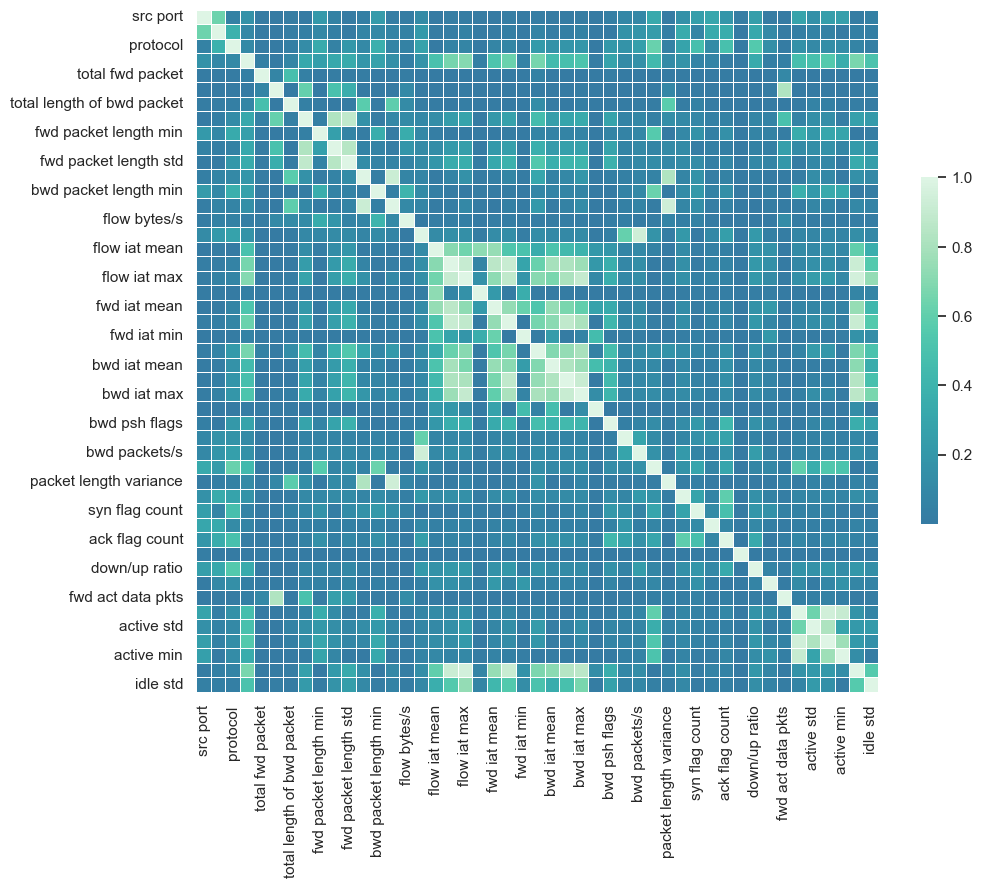

In [123]:
sns.set_theme(style="white")

corr = processed.select_dtypes(include='number').corr().abs()
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, cmap='mako', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [143]:
processed.select_dtypes(exclude='number').columns

Index(['activity', 'stage'], dtype='object')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'benign'),
  Text(1, 0, 'lateral movement'),
  Text(2, 0, 'reconnaissance'),
  Text(3, 0, 'establish foothold'),
  Text(4, 0, 'data exfiltration')])

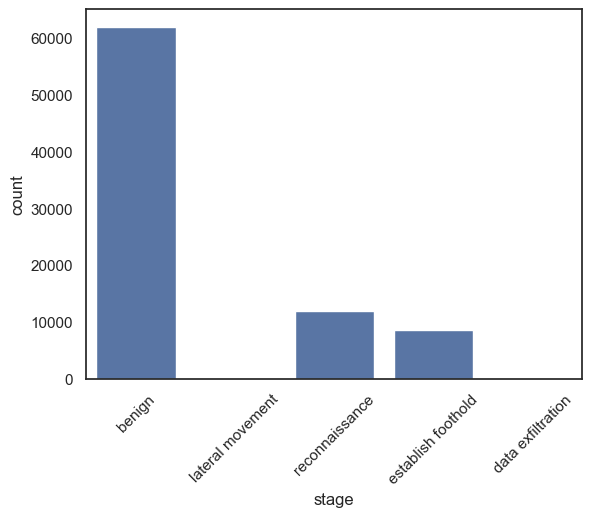

In [153]:
sns.countplot(processed, x='stage')
plt.xticks(rotation=45)


In [156]:
processed[processed.stage == 'data exfiltration'].shape[0]

15

## Modeling

In [2]:
import models.fwc2
from torchinfo import summary

summary(models.fwc2.FWC2Model(input_dim=47))

Layer (type:depth-idx)                   Param #
FWC2Model                                --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       12,288
│    └─BatchNorm1d: 2-2                  512
│    └─ReLU: 2-3                         --
│    └─Dropout: 2-4                      --
│    └─Linear: 2-5                       32,896
│    └─BatchNorm1d: 2-6                  256
│    └─ReLU: 2-7                         --
│    └─Dropout: 2-8                      --
├─Sequential: 1-2                        --
│    └─Linear: 2-9                       16,512
│    └─BatchNorm1d: 2-10                 256
│    └─ReLU: 2-11                        --
│    └─Linear: 2-12                      8,256
Total params: 70,976
Trainable params: 70,976
Non-trainable params: 0

## Baseline models
- XGBOOST & RF 

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

def split_data(X, y, test_size=0.2, random_state=42):
   X_train, X_test, y_train, y_test = train_test_split(
       X, y, test_size=test_size, random_state=random_state
   )
   return X_train, X_test, y_train, y_test

def train_eval_models(X_train, y_train, X_test, y_test):
   xgb = XGBClassifier(objective='multi:softmax')
   xgb.fit(X_train, y_train)
   xgb_preds = xgb.predict(X_test)
   
   xgb_accuracy = accuracy_score(y_test, xgb_preds)
   xgb_precision = precision_score(y_test, xgb_preds, average='macro')
   xgb_f1 = f1_score(y_test, xgb_preds, average='macro')
#    xgb_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
   
   rf = RandomForestClassifier()
   rf.fit(X_train, y_train)
   rf_preds = rf.predict(X_test)
   
   rf_accuracy = accuracy_score(y_test, rf_preds)
   rf_precision = precision_score(y_test, rf_preds, average='macro') 
   rf_f1 = f1_score(y_test, rf_preds, average='macro')
#    rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
   
   return {
       'xgb_accuracy': xgb_accuracy,
       'xgb_precision': xgb_precision,
       'xgb_f1': xgb_f1, 
    #    'xgb_auc': xgb_auc,
       'rf_accuracy': rf_accuracy,
       'rf_precision': rf_precision,
       'rf_f1': rf_f1,
    #    'rf_auc': rf_auc
   }

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = processed.drop(['stage', 'activity'], axis='columns')
Y = processed['stage'].values

l_enc = LabelEncoder()
Y_enc = l_enc.fit_transform(Y)

X_train, X_test, y_train, y_test = split_data(X, Y_enc)

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
report = train_eval_models(X_train, y_train, X_test, y_test)
report

{'xgb_accuracy': 0.9965488011625091,
 'xgb_precision': 0.9895930188834688,
 'xgb_f1': 0.9407922435213129,
 'rf_accuracy': 0.9909178977960765,
 'rf_precision': 0.915636081865055,
 'rf_f1': 0.7971184887077771}

In [112]:
import torch
import torch.nn.functional as F

# Example of target with class indices
input = torch.randn(3, 5, requires_grad=True)
target = torch.randint(5, (3,), dtype=torch.int64)
loss = F.cross_entropy(input, target)
loss.backward()

print(input)
print(target)
print(loss)

# Example of target with class probabilities
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
loss = F.cross_entropy(input, target)
loss.backward()

print(input)
print(target)
print(loss)


tensor([[-0.7076,  1.5673, -0.0769,  0.1050,  0.1613],
        [-2.3399,  0.8425, -0.4011,  2.5219,  1.0719],
        [ 1.7696, -1.3726,  1.0307,  0.7405, -1.1970]], requires_grad=True)
tensor([1, 4, 1])
tensor(2.0720, grad_fn=<NllLossBackward0>)
tensor([[ 0.2098,  0.8522,  0.2210,  1.7980,  0.4979],
        [ 0.8075,  1.3185, -0.2084, -0.7332, -1.0544],
        [-1.0593, -0.2121,  0.2482, -0.5663, -0.4801]], requires_grad=True)
tensor([[0.4445, 0.0237, 0.3226, 0.0619, 0.1473],
        [0.1021, 0.4868, 0.2248, 0.0773, 0.1089],
        [0.2043, 0.0983, 0.1491, 0.2463, 0.3020]])
tensor(1.8181, grad_fn=<DivBackward1>)
